# Escalamiento de datos numéricos

### Transformaciones lineales

In [ ]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import preprocessing



X, y = datasets.load_diabetes(return_X_y=True)

raw = X[:, None, 2]

In [ ]:
raw

<class 'numpy.ndarray'>


Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

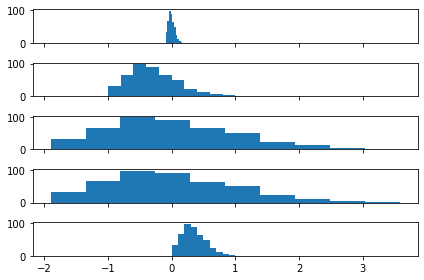

In [ ]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)


scaler = preprocessing.StandardScaler().fit(raw)
X_scaled = scaler.transform(raw)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(5, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)
axs[3].hist(X_scaled)
axs[4].hist(X_train_minmax)

In [ ]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.03798094099329319 
trainning time for scaled data : 0.043820909995702095
trainning time for z_scaled data : 0.04054294900561217


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

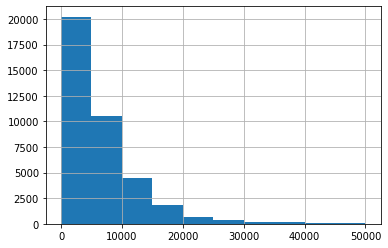

In [ ]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

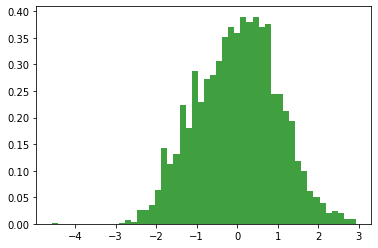

In [ ]:
from sklearn.model_selection import train_test_split

bc = PowerTransformer(method="box-cox")
orice_usd = df.price_usd
X = orice_usd.to_numpy()
X = np.reshape(X, (len(X),1))
X_train, X_test = train_test_split(X, test_size=0.5)

# perform power transforms and quantile transform
X_trans_bc = bc.fit(X_train).transform(X_test)

n, bins, patches = plt.hist(X_trans_bc, 50, density=True, facecolor='g', alpha=0.75)

#df.price_usd.apply(lambda x: np.tanh(x/p)).hist()


* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

 [ 0.73771005]
 [ 0.87524785]
 [ 1.90694819]
 [ 0.35424887]
 [ 0.17397588]
 [ 2.4486624 ]
 [ 1.26513927]
 [ 0.85437633]
 [ 1.20457655]
 [ 5.71487419]
 [ 0.88575316]
 [ 0.65415425]
 [ 1.17631547]
 [ 2.20615368]
 [ 0.35373842]
 [ 0.15474551]
 [ 4.03559328]
 [ 1.89583578]
 [ 1.97387527]
 [ 1.94936229]
 [ 1.06375333]
 [ 0.39088389]
 [ 1.26655669]
 [ 0.26313209]
 [ 0.15816833]
 [ 0.63330193]
 [ 0.29026577]
 [ 0.52459899]
 [ 0.28101633]
 [ 0.32296663]
 [ 0.43968691]
 [ 2.3475912 ]
 [ 4.4088618 ]
 [ 1.10593739]
 [ 1.63417456]
 [ 1.35398125]
 [ 0.67989095]
 [ 0.26413807]
 [ 1.30034787]
 [ 2.13841165]
 [ 1.69783901]
 [ 0.2971951 ]
 [ 0.16699466]
 [ 3.07377141]
 [ 0.3343905 ]
 [ 1.1395342 ]
 [ 0.05929032]
 [ 0.15417594]
 [ 2.95725852]
 [ 0.72348296]
 [13.62746116]
 [ 0.11898896]
 [ 0.67333096]
 [ 0.16945281]
 [ 0.68347929]
 [ 0.65795287]
 [ 1.86992383]
 [ 1.0090772 ]
 [ 2.01026996]
 [ 0.42734744]
 [ 1.15215084]
 [ 0.34975358]
 [ 0.29625521]
 [ 0.64107826]
 [ 4.01739216]
 [ 0.38957335]
 [ 2.50688

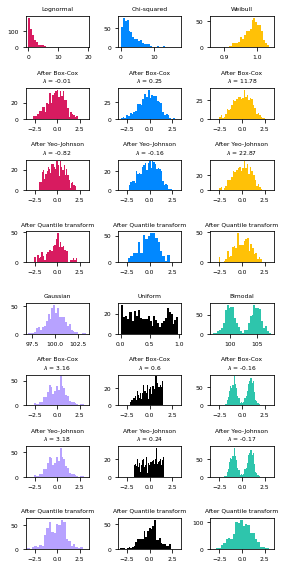

In [ ]:
# Author: Eric Chang <ericchang2017@u.northwestern.edu>
#         Nicolas Hug <contact@nicolas-hug.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

print(X_lognormal)

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30038ac3-1da7-46e9-9bee-8514ba73593b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>